# Breast cancer prediction

## Importing libariers , Reading Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("breast-cancer.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploration The Data

In [4]:
data.shape

(569, 32)

In [5]:
data.size

18208

In [6]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [7]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
duplicates=data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


#### col 'Id' doesn't contain any useful information so we can drop it

In [9]:
data.drop(['id'], axis = 1, inplace = True)

In [10]:
data[['radius_mean','perimeter_mean','area_mean']]

,radius_mean,perimeter_mean,area_mean
0,17.99,122.80,1001.0
1,20.57,132.90,1326.0
2,19.69,130.00,1203.0
3,11.42,77.58,386.1
4,20.29,135.10,1297.0
...,...,...,...
564,21.56,142.00,1479.0
565,20.13,131.20,1261.0
566,16.60,108.30,858.1
567,20.60,140.10,1265.0


#### "radius_mean", "perimeter_mean", "area_mean" have the same info so we can drop 2 of them

In [11]:
data.drop(['perimeter_mean', 'area_mean'], axis = 1, inplace = True)
data.shape

(569, 29)

In [12]:
data[['radius_worst','perimeter_worst','area_worst']]

,radius_worst,perimeter_worst,area_worst
0,25.380,184.60,2019.0
1,24.990,158.80,1956.0
2,23.570,152.50,1709.0
3,14.910,98.87,567.7
4,22.540,152.20,1575.0
...,...,...,...
564,25.450,166.10,2027.0
565,23.690,155.00,1731.0
566,18.980,126.70,1124.0
567,25.740,184.60,1821.0


#### 'radius_worst','perimeter_worst','area_worst' have the same info so we can drop 2 of them

In [13]:
data.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)
data.shape

(569, 27)

In [14]:
data[['radius_se','perimeter_se','area_se']]

,radius_se,perimeter_se,area_se
0,1.0950,8.589,153.40
1,0.5435,3.398,74.08
2,0.7456,4.585,94.03
3,0.4956,3.445,27.23
4,0.7572,5.438,94.44
...,...,...,...
564,1.1760,7.673,158.70
565,0.7655,5.203,99.04
566,0.4564,3.425,48.55
567,0.7260,5.772,86.22


#### 'radius_se','perimeter_se','area_se' have the same info so we can drop 2 of them

In [15]:
data.drop(['perimeter_se','area_se'],axis=1,inplace=True)
data.shape

(569, 25)

In [16]:
data.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,...,0.020542,0.003795,16.269190,25.677223,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,...,0.008266,0.002646,4.833242,6.146258,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,...,0.007882,0.000895,7.930000,12.020000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,...,0.015160,0.002248,13.010000,21.080000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,...,0.018730,0.003187,14.970000,25.410000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,...,0.023480,0.004558,18.790000,29.720000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,...,0.078950,0.029840,36.040000,49.540000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

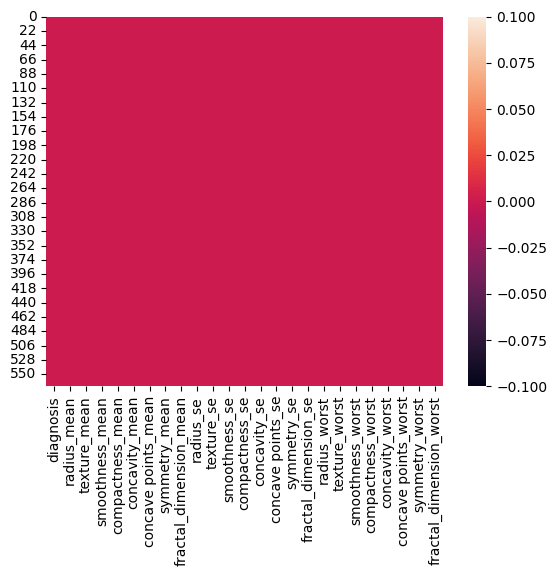

In [18]:
sns.heatmap(data.isnull())

#### converting the diagnosis into 0 and 1 using label encoder.

In [19]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

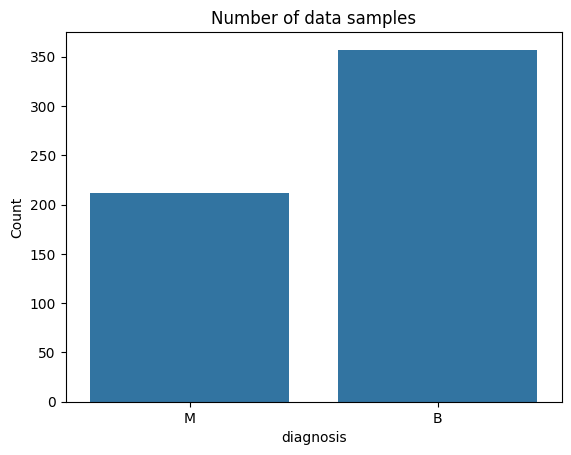

In [20]:
sns.countplot(x = 'diagnosis', data = data)
plt.title("Number of data samples")
plt.xlabel("diagnosis")
plt.ylabel("Count")
plt.show()

In [21]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

### Checking the outlayers

<Axes: >

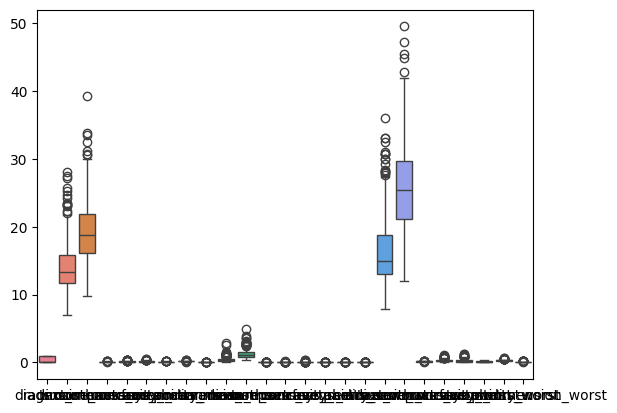

In [22]:
sns.boxplot(data)

## Discovering relationships between features

<Axes: >

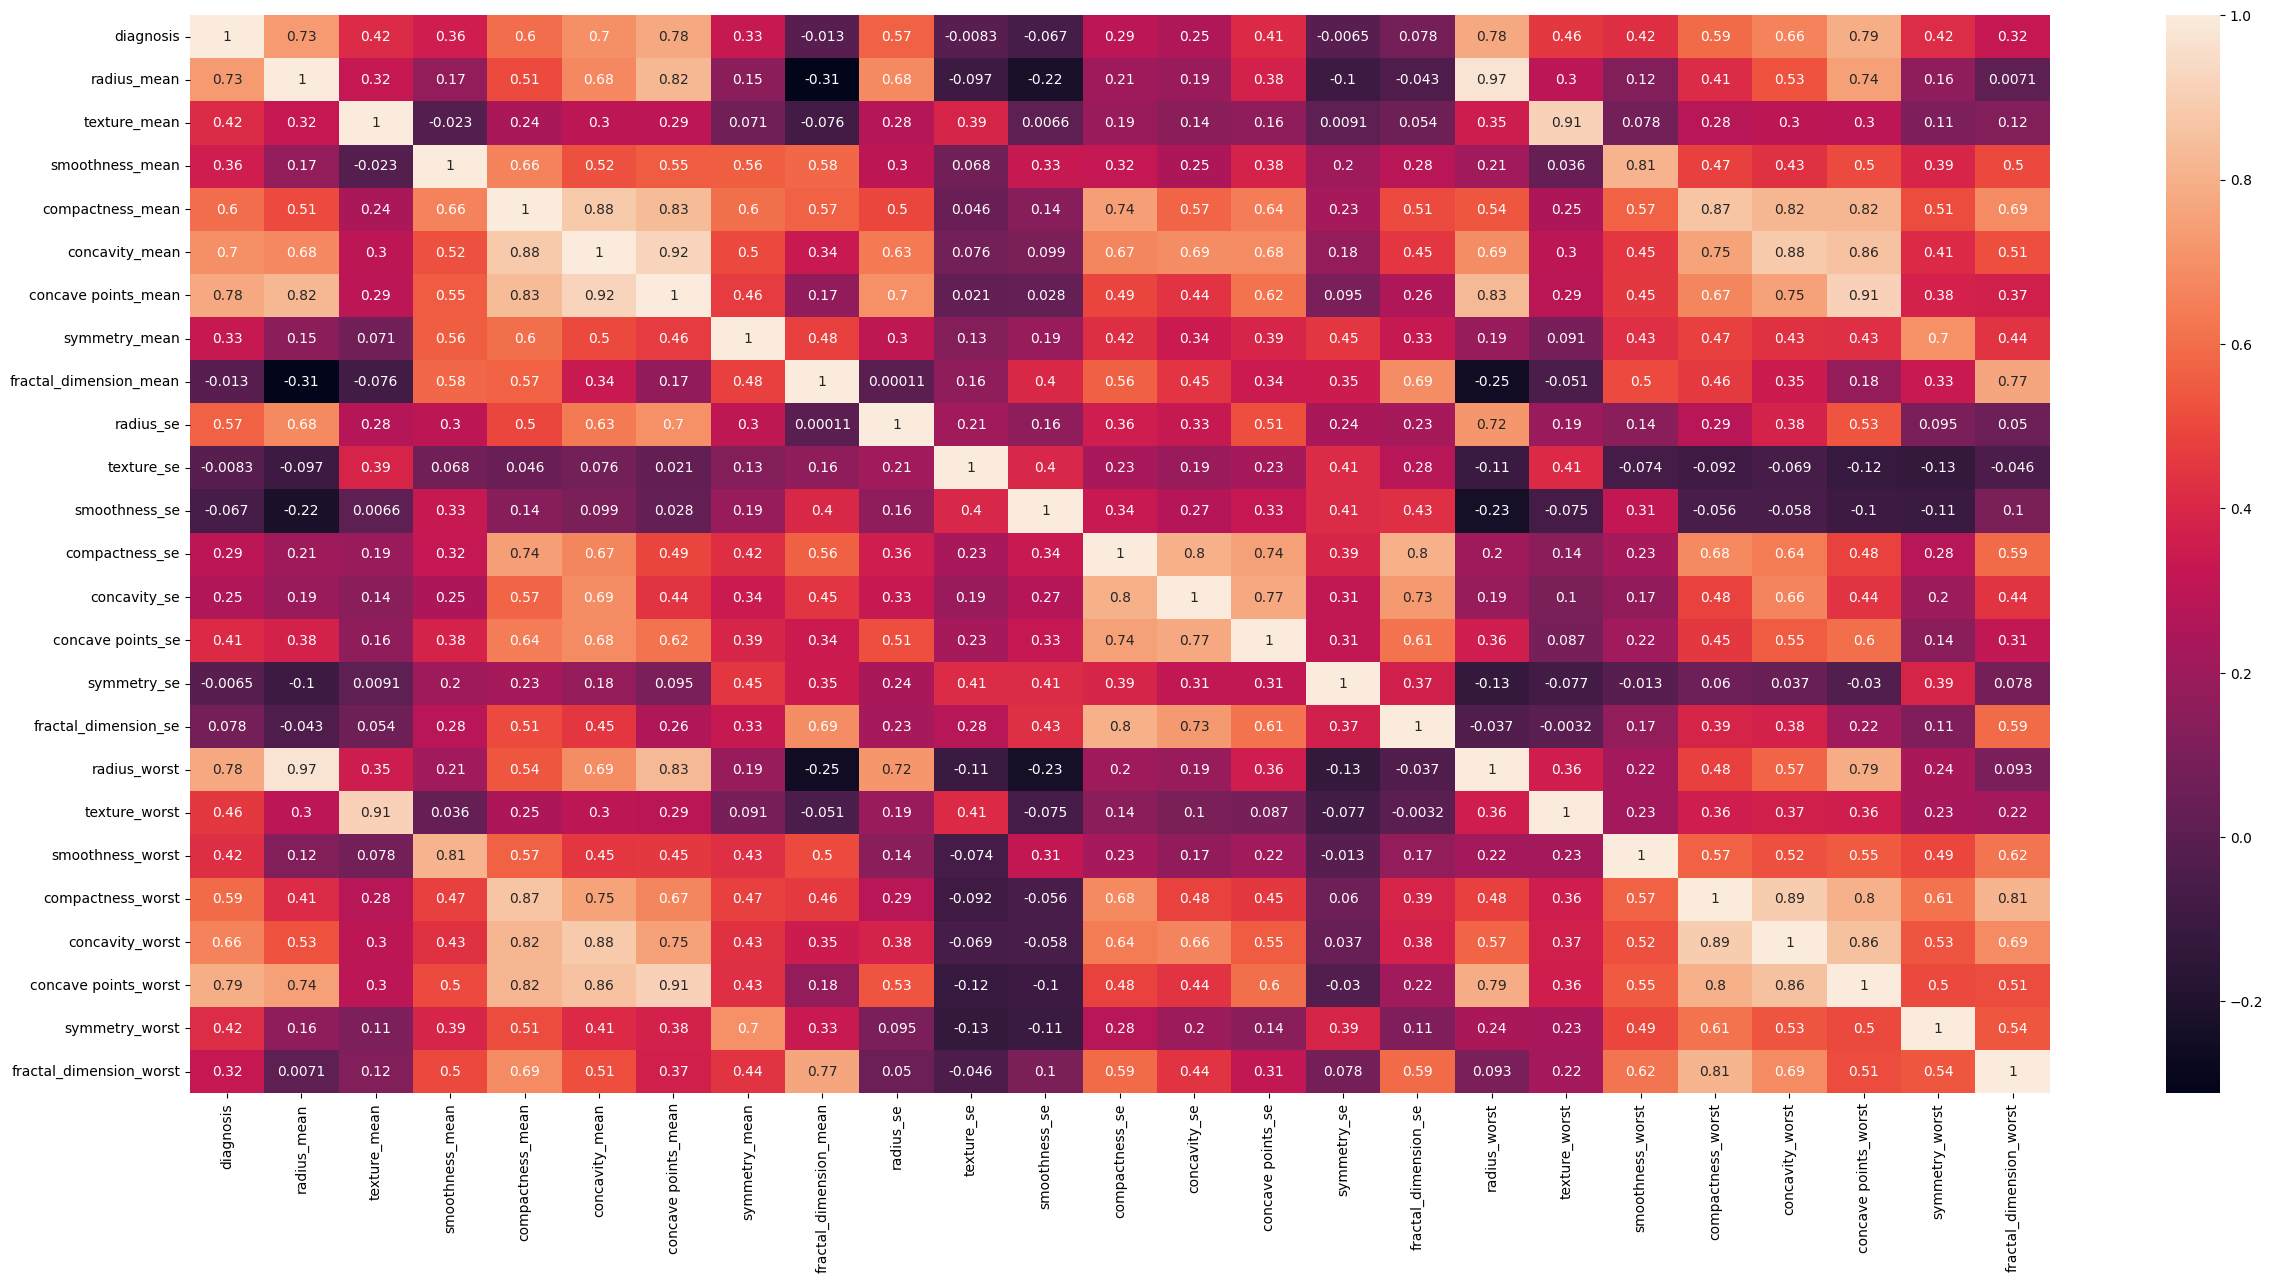

In [23]:
plt.figure(figsize=(30,14))
sns.heatmap(data.corr(),annot=True)

#### correlation coefficient is close to 1, it indicates a strong positive linear relationship, so we can drop one of them

In [24]:
corr_coeff = data['smoothness_mean'].corr(data['smoothness_worst'])
print(f"Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'smoothness_mean', 'smoothness_worst' is : 0.8053241954943628


In [25]:
corr_coeff = data['symmetry_mean'].corr(data['symmetry_worst'])
print(f"Pearson correlation coefficient between 'symmetry_mean', 'symmetry_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'symmetry_mean', 'symmetry_worst' is : 0.6998257976437305


In [26]:
corr_coeff = data['concave points_worst'].corr(data['concave points_mean'])
print(f"Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'radius_mean', 'radius_worst' is : 0.9101553142985929


In [27]:
corr_coeff = data['texture_mean'].corr(data['texture_worst'])
print(f"Pearson correlation coefficient between 'texture_mean', 'texture_worst' is : {corr_coeff}")

Pearson correlation coefficient between 'texture_mean', 'texture_worst' is : 0.9120445888404213


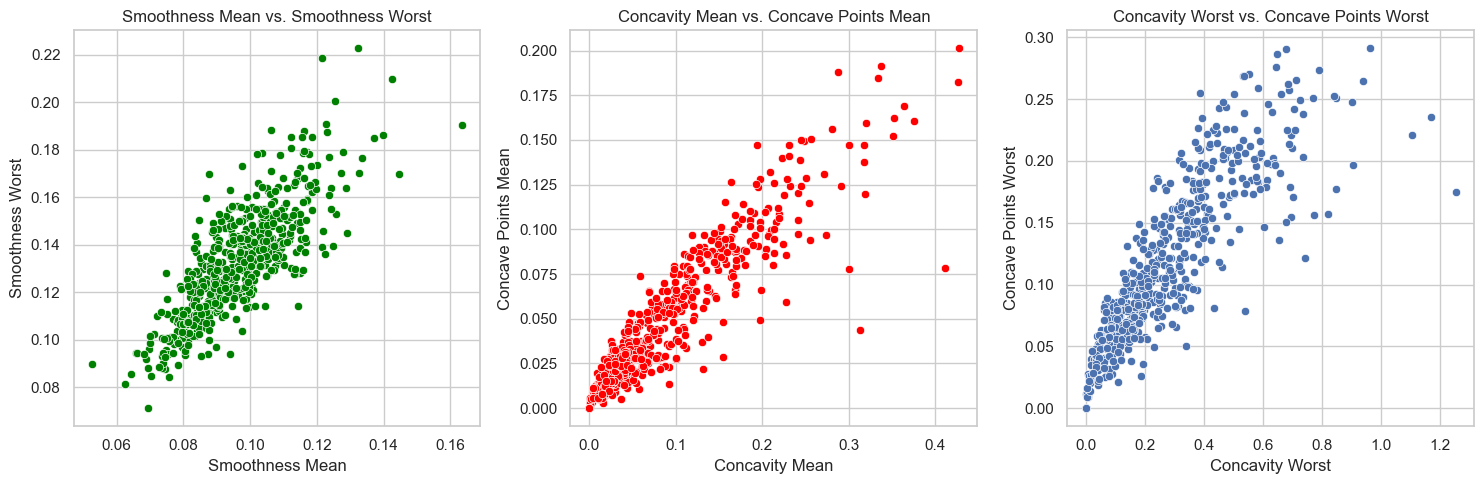

In [28]:
sns.set(style="whitegrid") 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.scatterplot(x='smoothness_mean', y='smoothness_worst', data=data, ax=axes[0], color='green')
axes[0].set_title('Smoothness Mean vs. Smoothness Worst')
axes[0].set_xlabel('Smoothness Mean')
axes[0].set_ylabel('Smoothness Worst')

# Plot 2
sns.scatterplot(x='concavity_mean', y='concave points_mean', data=data, ax=axes[1], color='red')
axes[1].set_title('Concavity Mean vs. Concave Points Mean')
axes[1].set_xlabel('Concavity Mean')
axes[1].set_ylabel('Concave Points Mean')

# Plot 3
sns.scatterplot(x='concavity_worst', y='concave points_worst', data=data, ax=axes[2])
axes[2].set_title('Concavity Worst vs. Concave Points Worst')
axes[2].set_xlabel('Concavity Worst')
axes[2].set_ylabel('Concave Points Worst')

plt.tight_layout()
plt.show()

In [29]:
 data.drop(['radius_worst','concave points_mean','texture_worst','symmetry_worst','smoothness_worst'],axis=1,inplace=True)

## Feature and Target Selection

In [30]:
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [31]:
from sklearn.preprocessing import  StandardScaler

scl =StandardScaler()
x_scaled = scl.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=.2,random_state=42)

### Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
log_cls = LogisticRegression(random_state= 42)

In [34]:
log_cls.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [35]:
y_pred= log_cls.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [36]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(y_test, y_pred)

print('Confusion Matrix for LogisticRegression:')
print(conf_matrix)

Confusion Matrix for LogisticRegression:
[[69  2]
 [ 1 42]]


In [37]:
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

num of True Positive : 42
num of True Negative : 69
num of False Positive : 2
num of False Negative : 1


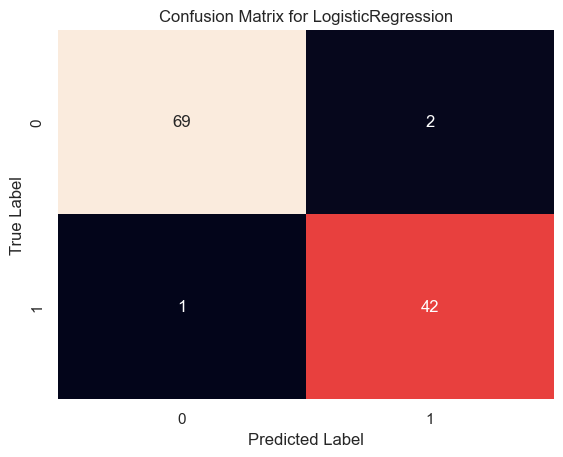

In [38]:
sns.heatmap(conf_matrix, annot= True, fmt='d',cbar= False)
plt.title('Confusion Matrix for LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for LogisticRegression:')
print(classification_rep)


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LogisticRegression : {accuracy*100:.2f} %')

Accuracy of LogisticRegression : 97.37 %


In [41]:
from sklearn.model_selection import cross_val_score, KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(log_cls, x, y, cv=kf)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation of accuracy: {np.std(scores)}")

Cross-validation scores: [0.95614035 0.96491228 0.92982456 0.92105263 0.89380531]
Mean accuracy: 0.9331470268591835
Standard deviation of accuracy: 0.025466873311407744


### SVM

In [42]:
from sklearn.svm import SVC
svm_mdl= SVC(random_state= 42)

In [43]:
svm_mdl.fit(x_train,y_train)

SVC(random_state=42)

In [44]:
y_pred= svm_mdl.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [45]:
conf_matrix = confusion_matrix(y_test,y_pred)

print('Confusion Matrix for Support Vector Machines:')
print(conf_matrix)

Confusion Matrix for Support Vector Machines:
[[70  1]
 [ 4 39]]


In [46]:
print("num of True Positive :",conf_matrix[1][1])
print("num of True Negative :",conf_matrix[0][0])
print("num of False Positive :",conf_matrix[0][1])
print("num of False Negative :",conf_matrix[1][0])

num of True Positive : 39
num of True Negative : 70
num of False Positive : 1
num of False Negative : 4


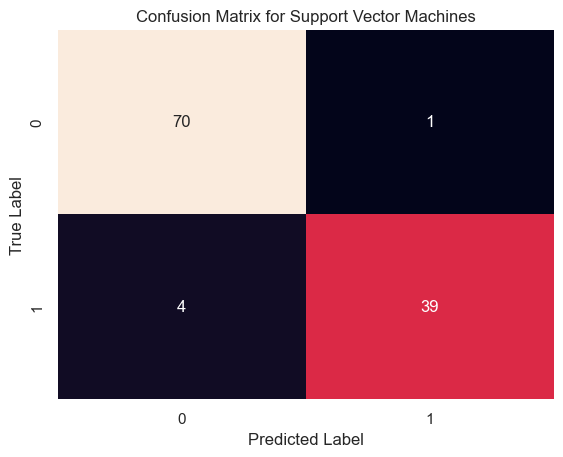

In [47]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Support Vector Machines')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
classification_rep= classification_report(y_test,y_pred)
print('\nClassification Report for Support Vector Machine:')
print(classification_rep)


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of Support Vector Machines : {accuracy*100:.2f} %')

Accuracy of Support Vector Machines : 95.61 %


In [50]:
scores = cross_val_score(svm_mdl, x, y, cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation of accuracy: {np.std(scores)}")

Cross-validation scores: [0.9122807  0.89473684 0.90350877 0.92982456 0.84955752]
Mean accuracy: 0.8979816798633753
Standard deviation of accuracy: 0.02684923799061805


### Naive bayse

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [52]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


### PCA

In [53]:
from sklearn.decomposition import PCA

data_std = (data - data.mean()) / (data.std())
n_components = 19
pca = PCA(n_components = n_components)
PrincipalComponents = pca.fit_transform(data_std)
Principals = pd.DataFrame(data=PrincipalComponents)
original_columns = data.columns
component_names = [f'PC{i+1} ({", ".join(original_columns[np.abs(pca.components_[i]).argsort()[-3:][::-1]])})' for i in range(n_components)]
Principals.columns = component_names

print(Principals)

     PC1 (compactness_mean, concavity_mean, concavity_worst)  \
0                                             7.206944         
1                                            -0.055886         
2                                             3.710117         
3                                             9.717836         
4                                             2.075001         
..                                                 ...         
564                                           3.044607         
565                                           1.154235         
566                                           0.718550         
567                                           8.567149         
568                                          -4.422210         

     PC2 (radius_mean, fractal_dimension_mean, smoothness_se)  \
0                                            -0.296176          
1                                            -2.562745          
2                                   

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

model = LogisticRegression()
model.fit(x_train_pca, y_train)

accuracy = model.score(x_test_pca, y_test)
print("Model accuracy after PCA:", accuracy)

Model accuracy after PCA: 0.9736842105263158


### Decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
mdl = DecisionTreeClassifier(random_state=42)

In [56]:
mdl.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
mdl.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [58]:
mdl.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [59]:
predictions = mdl.predict(x_test)
predictions #there 0,1 based on the higher probability

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [60]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix for DecisionTree :')
cnfmat=confusion_matrix(y_test,predictions)
print(cnfmat)

print("num of True Positive :",cnfmat[1][1])
print("num of True Negative :",cnfmat[0][0])
print("num of False Positive :",cnfmat[0][1])
print("num of False Negative :",cnfmat[1][0])

Confusion Matrix for DecisionTree :
[[64  7]
 [ 4 39]]
num of True Positive : 39
num of True Negative : 64
num of False Positive : 7
num of False Negative : 4


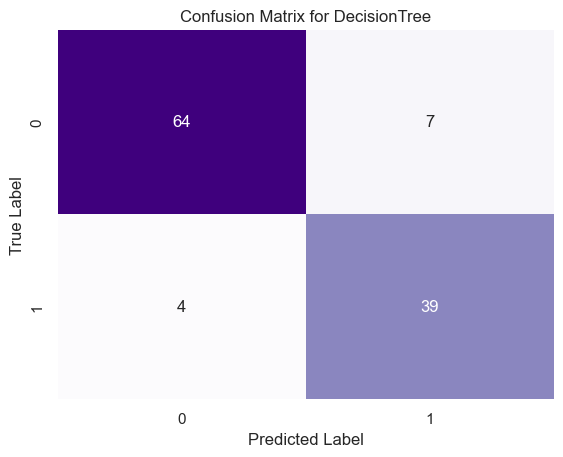

In [61]:
sns.heatmap(cnfmat, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix for DecisionTree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["malignant","benign"]))

              precision    recall  f1-score   support

   malignant       0.94      0.90      0.92        71
      benign       0.85      0.91      0.88        43

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



In [63]:
#now that we have the predictions for each of the test instances now we're going to see if they're good or not by comparing it to the actual info 
#by using confusion matrix

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print(accuracy * 100 ,"%")

90.35087719298247 %


In [64]:
from sklearn.model_selection import cross_val_score, KFold
k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(mdl, x, y, cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation of accuracy: {np.std(scores)}")

Cross-validation scores: [0.9122807  0.92105263 0.89473684 0.92105263 0.92920354]
Mean accuracy: 0.9156652693681104
Standard deviation of accuracy: 0.011754033143731085


### Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
RFmdl = RandomForestClassifier(random_state=42)

In [66]:
RFmdl.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
RFmdl.predict_proba(x_test)

array([[0.88, 0.12],
       [0.01, 0.99],
       [0.02, 0.98],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.26, 0.74],
       [0.09, 0.91],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.16, 0.84],
       [0.86, 0.14],
       [0.33, 0.67],
       [0.93, 0.07],
       [0.15, 0.85],
       [0.92, 0.08],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.7 , 0.3 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.84, 0.16],
       [0.93, 0.07],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.64, 0.36],
       [0.78, 0.22],
       [0.02, 0.98],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.9 ,

In [68]:
predictions = RFmdl.predict(x_test)
predictions #there 0,1 based on the higher probability

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [69]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for RandomFores :')
confmat=confusion_matrix(y_test,predictions)
print(confmat)
print()
print("num of True Positive :",confmat[1][1])
print("num of True Negative :",confmat[0][0])
print("num of False Positive :",confmat[0][1])
print("num of False Negative :",confmat[1][0])

Confusion Matrix for RandomFores :
[[69  2]
 [ 3 40]]

num of True Positive : 40
num of True Negative : 69
num of False Positive : 2
num of False Negative : 3


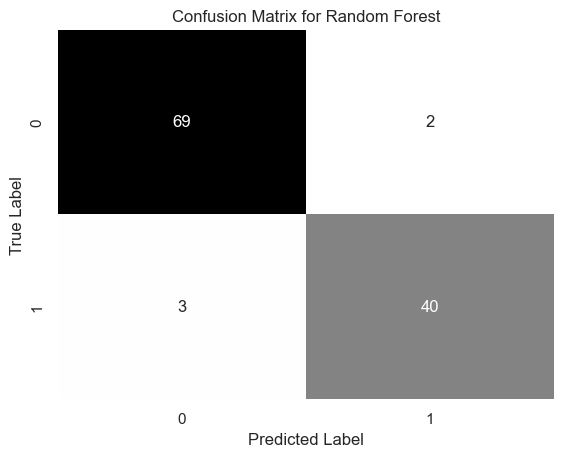

In [70]:
sns.heatmap(confmat, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=["malignant","benign"]))

              precision    recall  f1-score   support

   malignant       0.96      0.97      0.97        71
      benign       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [72]:
#now that we have the predictions for each of the test instances now we're going to see if they're good or not by comparing it to the actual info 
#by using confusion matrix
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print(accuracy * 100 ,"%")

95.6140350877193 %


In [73]:
from sklearn.model_selection import cross_val_score, KFold
k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(RFmdl, x, y, cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation of accuracy: {np.std(scores)}")

Cross-validation scores: [0.94736842 0.95614035 0.94736842 0.95614035 0.94690265]
Mean accuracy: 0.9507840397453812
Standard deviation of accuracy: 0.004376715402266793


### Stacking

In [74]:
from sklearn.ensemble import StackingClassifier

In [75]:
base_estimators = [
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression())
]  

In [76]:
meta_model =LogisticRegression()

In [77]:
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_model)

In [78]:
stacking_model.fit(x_train,y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [79]:
pred_stacking = stacking_model.predict(x_test)

In [80]:
accuracy=accuracy_score(y_test, pred_stacking)
print("Stacking Accuracy:",accuracy * 100,"%")

Stacking Accuracy: 95.6140350877193 %


In [81]:
from sklearn.model_selection import cross_val_score, KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(stacking_model, x, y, cv=kf)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation of accuracy: {np.std(scores)}")

Cross-validation scores: [0.96491228 0.95614035 0.92105263 0.93859649 0.95575221]
Mean accuracy: 0.947290793355069
Standard deviation of accuracy: 0.015649019902769956
